### Notebook to find variants of a genome mapped on the de Bruijn graph of a RPGG (RR PanGenome Graph)

In [1]:
%matplotlib notebook
import bioinformatics_functions as bio
import gzip
import os
import matplotlib.pyplot as plt
import numpy as np


In [82]:
def read_tr_kmers(file):
    tr_elements = set()
    with open(file, 'r') as tr_elem:
        for line in tr_elem:
            line = line.rsplit()
            if not '>0' in line:
                tr_elements.add(int(line[0]))
    return tr_elements
            
def add_sequence_to_multiplicity_dict(edit_list, multiplicity_dict, read, k, read_index, tr_elements):
    print(edit_list, len(edit_list))
    n = len(read)
    for i in range(len(edit_list)):
        pos = edit_list[i][0]
        # move through this position along the read
        
        # options:
        # mismatch; letter in the graph is shown. 
        # --> k entries in read are not found in graph
        # deletion; letter in the graph is shown as 0123 for ACGT, respectively
        # --> k-1 entries in read are not found in the graph
        # insertion: can be treated the same way as a mismatch

        # get the sequence from the read:
        if (edit_list[i][1] in list('ACTG')):
            max_pos = min(pos+k, n-k+1)         # max starting position in the read
        elif (edit_list[i][1] in list('I')):
            max_pos = min(pos+k, n-k+1)         # max starting position in the read
        elif edit_list[i][1] in list('0123'):
            max_pos = min(pos+k-1, n-k+1-1)
        else:
            print('An element was found that cannot be treated!!!')
                    
        for j in range( pos,max_pos ):
            if not j in read_index:
                read_index.append(j)

                # get the sequence from the read:
                seq = read[j:j+k]
                # get the reverse compliment
                seqs = [seq, bio.reverse_conjugate(seq)]
                # find the canonical sequence
                seqs.sort()
                # convert canonical sequence to number
                seq_num = bio.pattern_to_number(seqs[0])
             
                # check that the found kmer is not in the tandem repeat graph:
 #               if not seq_num in tr_elements:
                # include the canonical sequence in number format to the dictionary
                if seq_num in multiplicity_dict.keys():
                    multiplicity_dict[seq_num] += 1
                else:
                    multiplicity_dict[seq_num] = 1    
                        
    return multiplicity_dict
        

def evaluate_ops(read, ops, multiplicity_dict, k, tr_elements):
    n = len(ops)
    region = ''
    edit_list = []    
    for i in range(n):
        read_index = []
        char = ops[i]
        left = ops[max(0,i-1)]     # characters left and right of index i
        right = ops[min(i+1, n-1)]
        
        if char in list('.*'):
            region = 'ignore'
        elif char in list('='):
            region = 'TR'
        elif ops[i] in list('ATCG0123I'):
            # check if if a neighboring edit is either in flank or unassigned
            if left in list('.*') or right in list('.*'):
                edit_list = []   # empty the edit list
                region = 'ignore'
            elif left in list('=') and right in list('='):
                edit_list.append([i,char])
                multiplicity_dict=add_sequence_to_multiplicity_dict(edit_list, multiplicity_dict, read, k, read_index, tr_elements)
                edit_list=[]
            elif left in list('='):
                edit_list.append([i,char])
                region = 'TR'
                if i==n-1:   # last element
                    multiplicity_dict=add_sequence_to_multiplicity_dict(edit_list, multiplicity_dict, read, k, read_index, tr_elements)
                    edit_list = []
            elif right in list('=') and region in ['', 'TR']:
                edit_list.append([i,char])
                multiplicity_dict=add_sequence_to_multiplicity_dict(edit_list, multiplicity_dict, read, k, read_index, tr_elements)
                edit_list = []
            elif left in list('ATCG0123I') and right in list('ATCG0123I') and region in ['','TR']:
                edit_list.append([i,char])
                if i==n-1:   # last element
                    multiplicity_dict=add_sequence_to_multiplicity_dict(edit_list, multiplicity_dict, read, k, read_index, tr_elements)
                    edit_list = []
#        if len(read_index)>0: print(len(read_index))
    return multiplicity_dict
                        


.	0	>HG00171.1.0.2:>cluster18_contig_417:415759:419205_817_1365_2:0:0_1:0:0_4:0	CGCCCGAGAAGACAGGCGGTGGCGGAGATCTTCAGAGAGAGAGATGCCCGAGAAGACAGGCGGAGGCGGAGATCTTCAGAGAGAGGTGGCGGAGATCTTCAGAGAGAAGACACGTGAGAAGACAGGTGGTGGCGGAGATCTTCAGAGAGA	==================================================================================================================================	>HG00171.1.0.2:>cluster18_contig_417:415759:419205_817_1365_2:0:0_1:0:0_4:0	CGGGCATCCTCTCTCTGAAGATCTCCGCCCCCGCCTGTCTTCTCGGGCATCTCTCTCTCTGAAGATCTCCGCCACCGCCTGTCTTCTCGGGCGTCCTCTCTCTGAAGATCTCCGCCACCGCCTGTGCTCTCGGGCATCCTCTCTCTGAAG	=========0================================================================================================C========================

[[9, '0']] 1
[[106, 'C']] 1
sum(list(multiplicity_dict.values())) =  41
elemens in dictionary =  41


<IPython.core.display.Javascript object>


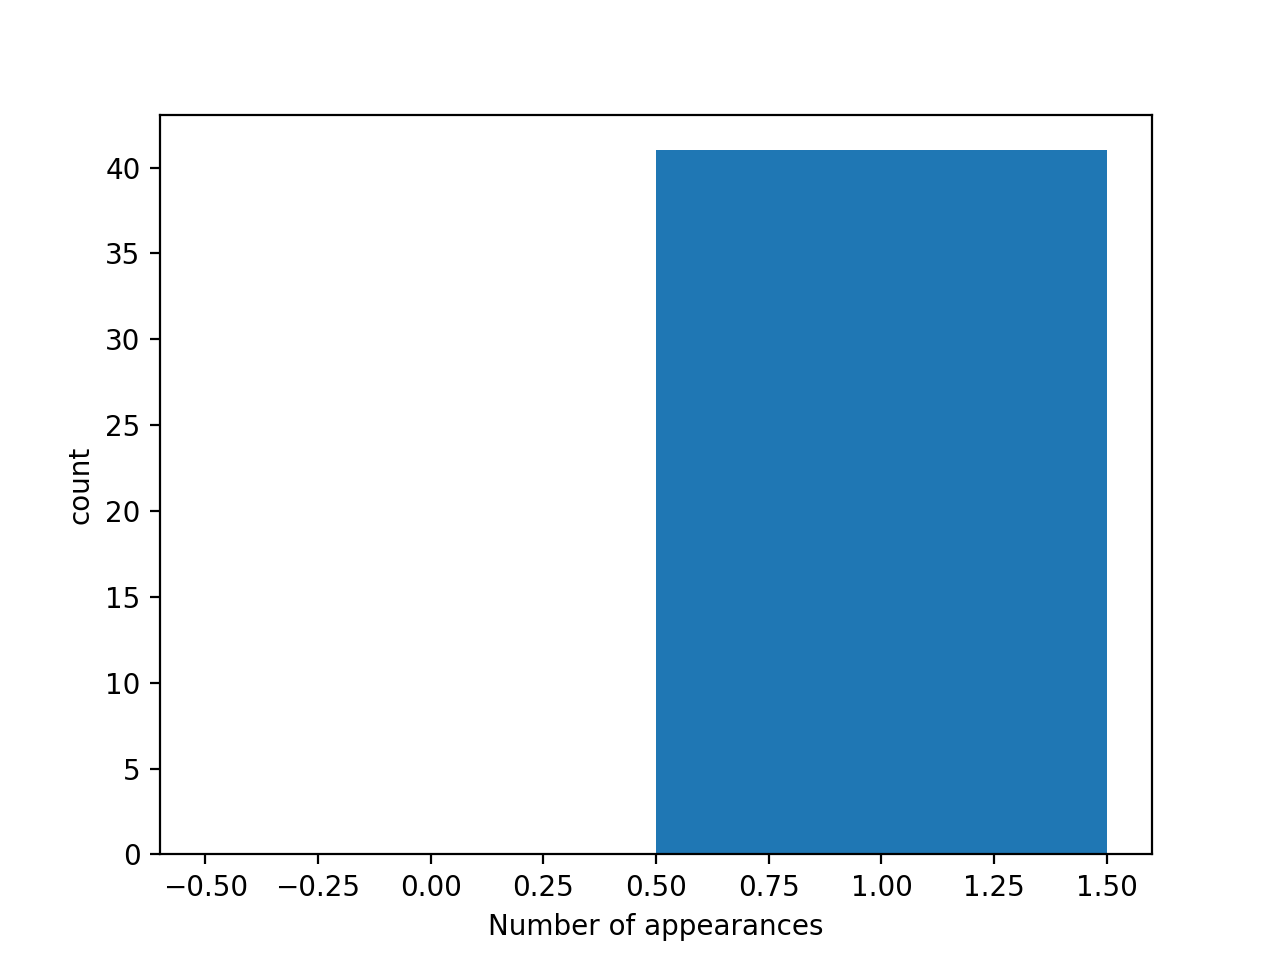

2914284161160 1 GGGCGGAGATCTTCAGAGAGA
2052466792021 1 CTCTCTGAAGATCTCCGCCCC
2930921829512 1 GGGGGCGGAGATCTTCAGAGA
1832242085154 1 CGGGGGCGGAGATCTTCAGAG
2657083776840 1 GCGGGGGCGGAGATCTTCAGA
2063963936101 1 CTGAAGATCTCCGCCCCCGCC
715823549940 1 AGGCGGGGGCGGAGATCTTCA
1278467515261 1 CAGGCGGGGGCGGAGATCTTC
152296577403 1 AAGATCTCCGCCCCCGCCTGT
609186309613 1 AGATCTCCGCCCCCGCCTGTC
569731868813 1 AGACAGGCGGGGGCGGAGATC
142432967203 1 AAGACAGGCGGGGGCGGAGAT
2234631497352 1 GAAGACAGGCGGGGGCGGAGA
558657874338 1 AGAAGACAGGCGGGGGCGGAG
2338687724136 1 GAGAAGACAGGCGGGGGCGGA
1534752382838 1 CCGCCCCCGCCTGTCTTCTCG
1520557517478 1 CCGAGAAGACAGGCGGGGGCG
1479651007145 1 CCCGAGAAGACAGGCGGGGGC
1467129257385 1 CCCCCGCCTGTCTTCTCGGGC
1470470518436 1 CCCCGCCTGTCTTCTCGGGCA
2436744189881 1 GATCTCCGCCACCGCCTGTGC
623469566499 1 AGCACAGGCGGTGGCGGAGAT
2354890647176 1 GAGCACAGGCGGTGGCGGAGA
588722661794 1 AGAGCACAGGCGGTGGCGGAG
2346203921000 1 GAGAGCACAGGCGGTGGCGGA
1533678643062 1 CCGCCACCGCCTGTGCTCTCG
1521027279782 1 CCGA

In [85]:
k = 21
n = 5

# read in the graph from the tandem repeat region:
path = os.path.join("/","Users","tkroll","Dropbox","uni_dropbox","Courses","bioinformatics_USC","rare_variants","rare_var","input")
file = path + "/" + "loo_HG00171.175.tr.kmers"   # HG00171 is the name of the gnome (human gemome 00171)
tr_elements = read_tr_kmers(file)

# read in the result from danbing-tk:
path = os.path.join("/","Users","tkroll","Dropbox","uni_dropbox","Courses","bioinformatics_USC","rare_variants","rare_var","output")
#file = path + "/" + "175.aln.gz"
file = path + "/" + "175.err.1bpindel.aln.test.gz"

multiplicity_dict = {}
cnt = 0

with gzip.open(file, 'rt') as f:
    for line in f:
        if cnt == n-1:
            print(line)
            read_forward_strand = line.split()[3]
            ops_forward_strand = line.split()[4]
            read_backward_strand = line.split()[6]
            ops_backward_strand = line.split()[7]
        
            # go through each ops and check if there is an edit, insertion or deletion
            multiplicity_dict=evaluate_ops(read_forward_strand, ops_forward_strand, multiplicity_dict, k, tr_elements)
            multiplicity_dict=evaluate_ops(read_backward_strand, ops_backward_strand, multiplicity_dict, k, tr_elements)
        cnt = cnt + 1

#print(multiplicity_dict)        
#for key in multiplicity_dict.keys():
#    print(key, multiplicity_dict[key], bio.number_to_pattern(key, k))
        
# plot the histogram:

#print(max(list(multiplicity_dict.values())))
#print(list(multiplicity_dict.values()))

print("sum(list(multiplicity_dict.values())) = ", sum(list(multiplicity_dict.values())))
print("elemens in dictionary = ", len(multiplicity_dict.keys()))

mylist = list(multiplicity_dict.values())
bins = np.arange(0,max(mylist)+2)-0.5
plt.hist(mylist, bins=bins)
plt.xlabel('Number of appearances')
plt.ylabel('count')
plt.show()        

# print the elements from the dictionary:
for key in multiplicity_dict.keys():
    print(key, multiplicity_dict[key], bio.number_to_pattern(key, k))

# check each found kmer if it is already in the graph:
# HG00171 is the name of the gnome (human gemome 00171)
# input/loo_HG00171.175.tr.kmers
# read in as set






In [74]:
#numpy.histogram(a, bins=10, range=None, density=None, weights=None)

mylist = list(multiplicity_dict.values())
hist_ = np.histogram(mylist, bins=bins+0.5)

for i in range(len(hist_[0])):
    print(int(hist_[1][i]), hist_[0][i])


0 0
1 62


yes


In [11]:

print(bio.reverse_conjugate('ATGCCCGAGAAGACAGGCGGA'))



TCCGCCTGTCTTCTCGGGCAT
